## Loading Files

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Library Imports
!pip install pandasql
from pandasql import sqldf
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
%cd drive/MyDrive/Work/LA Clippers

/content/drive/MyDrive/Work/LA Clippers


In [ ]:
# Files from Master Sheet
team_data = pd.read_excel('Data Challenge Master File.xlsx', sheet_name='Team Data')
ucp_member_report = pd.read_excel('Data Challenge Master File.xlsx', sheet_name='UCP Member Report')
ucp_reservations = pd.read_excel('Data Challenge Master File.xlsx', sheet_name='UCP Reservations')
ucp_scans = pd.read_excel('Data Challenge Master File.xlsx', sheet_name='UCP Scans')
single_stats = pd.read_excel('Data Challenge Master File.xlsx', sheet_name='Single Game Sales and Scans')
homestands = pd.read_excel('BasketballReference.xlsx')
all_games = homestands

In [ ]:
homestands.head()

,G,Unnamed: 1,Date,Start (ET),Unnamed: 4,Unnamed: 5,Unnamed: 6,Opponent,Unnamed: 8,Unnamed: 9,Tm,Opp,W,L,Streak
0,1,0,Thu Oct 20 2022,10:00p,NaN,Box Score,@,Los Angeles Lakers,W,NaN,103,97,1,0,W 1
1,2,1,Sat Oct 22 2022,10:00p,NaN,Box Score,@,Sacramento Kings,W,NaN,111,109,2,0,W 2
2,3,2,Sun Oct 23 2022,10:00p,NaN,Box Score,NaN,Phoenix Suns,L,NaN,95,112,2,1,L 1
3,4,3,Tue Oct 25 2022,8:00p,NaN,Box Score,@,Oklahoma City Thunder,L,NaN,94,108,2,2,L 2
4,5,4,Thu Oct 27 2022,8:00p,NaN,Box Score,@,Oklahoma City Thunder,L,NaN,110,118,2,3,L 3


## Task 1: Higher Attendance
Check whether Evening Games (Games after 6pm) or Afternoon Games (Games before 6pm) have higher attendance. Provide average attendace per game by month

In [ ]:
single_stats.head(1)

,event_datetime,event_name,ticket_id,section_name,row_name,seat_number,account_id,price,sale_datetime,scan_datetime
0,2023-03-25 19:30:00,LA Clippers 2022-23 Game 38 - New Orleans 3/25/23,9000000150774457,324,3,4,9000000038429857,30.0,2022-12-22 18:29:15,2023-03-25 20:43:54


In [ ]:
# Changing date format
single_stats['scan_datetime'] = single_stats['scan_datetime'].dt.date

In [ ]:
# Calculating counts based on date instances
counts = single_stats.groupby(single_stats['scan_datetime']).size()

In [ ]:
# Creating New DataFrame with just Date & Time
question_1 = pd.DataFrame()
question_1['Event'] = single_stats['event_datetime'].unique()
question_1['Date'] = question_1['Event'].dt.strftime('%Y-%m-%d')
question_1['Time'] = question_1['Event'].dt.strftime('%H:%M:%S')

# Defining Time Period
time_period = lambda x: 'evening' if int(x[:2]) >= 19 else 'afternoon'
question_1['Time Period'] = question_1["Time"].apply(time_period)

# Sorting by Event Date
question_1 = question_1.sort_values('Event') 

In [ ]:
# Get Single Sale Tickets
counts.index = counts.index.map(lambda x: x.strftime('%Y-%m-%d'))

for date in question_1['Date'].unique():
    count = counts.get(str(date))
    question_1.loc[question_1['Date'] == date, 'Single Scans'] = count

In [ ]:
# Get UCP Scans
ucp_scans['scan_datetime'] = ucp_scans['scan_datetime']
counts_ucp = ucp_scans.groupby(single_stats['scan_datetime']).size()

In [ ]:
# Concatening date and ucp_counts
counts_ucp.index = counts_ucp.index.map(lambda x: x.strftime('%Y-%m-%d'))

for date in question_1['Date'].unique():
    count = counts_ucp.get(str(date))
    question_1.loc[question_1['Date'] == date, 'UCP Scans'] = count

In [ ]:
# Calculating Total Scans
question_1['Total Scans'] = question_1[['Single Scans', 'UCP Scans']].sum(axis=1)

In [ ]:
# Total Attendance in afternoon and evening and getting average attendance
evening_games = question_1['Time Period'].value_counts()['evening']
afternoon_games = question_1['Time Period'].value_counts()['afternoon']

evening_att = 0
afternoon_att = 0

for index, row in question_1.iterrows():
    if row['Time Period'] == 'evening':
        evening_att += row['Total Scans']
    else:
        afternoon_att += row['Total Scans']

print('Total attendance in the evening:', evening_att)
print('Total attendance in the afternoon:', afternoon_att)

print('Average attendance in the evening:', evening_att / evening_games)
print('Average attendance in the afternoon:', afternoon_att / afternoon_games)


Total attendance in the evening: 71877.0
Total attendance in the afternoon: 15416.0
Average attendance in the evening: 2318.6129032258063
Average attendance in the afternoon: 1712.888888888889


In [ ]:
# Monthly Attendance
monthly_stats = pd.DataFrame(columns=["Month", "Attendance"])

question_1["Month"] = question_1["Event"].apply(lambda x: x.strftime('%Y-%m'))

monthly_attendance = question_1.groupby("Month")["Total Scans"].sum()
monthly_stats["Attendance"] = monthly_attendance.values

monthly_stats.set_index(question_1["Month"].unique(), inplace=True)
monthly_stats.index.name = "Month"

In [ ]:
question_1.head(5)

,Event,Date,Time,Time Period,Single Scans,UCP Scans,Total Scans,Month
4,2022-10-23 19:00:00,2022-10-23,19:00:00,evening,2574.0,329.0,2903.0,2022-10
21,2022-10-30 12:00:00,2022-10-30,12:00:00,afternoon,1255.0,120.0,1375.0,2022-10
25,2022-10-31 19:30:00,2022-10-31,19:30:00,evening,457.0,39.0,496.0,2022-10
16,2022-11-06 19:00:00,2022-11-06,19:00:00,evening,988.0,107.0,1095.0,2022-11
15,2022-11-07 19:30:00,2022-11-07,19:30:00,evening,1144.0,119.0,1263.0,2022-11


### Data Visualization Question 1

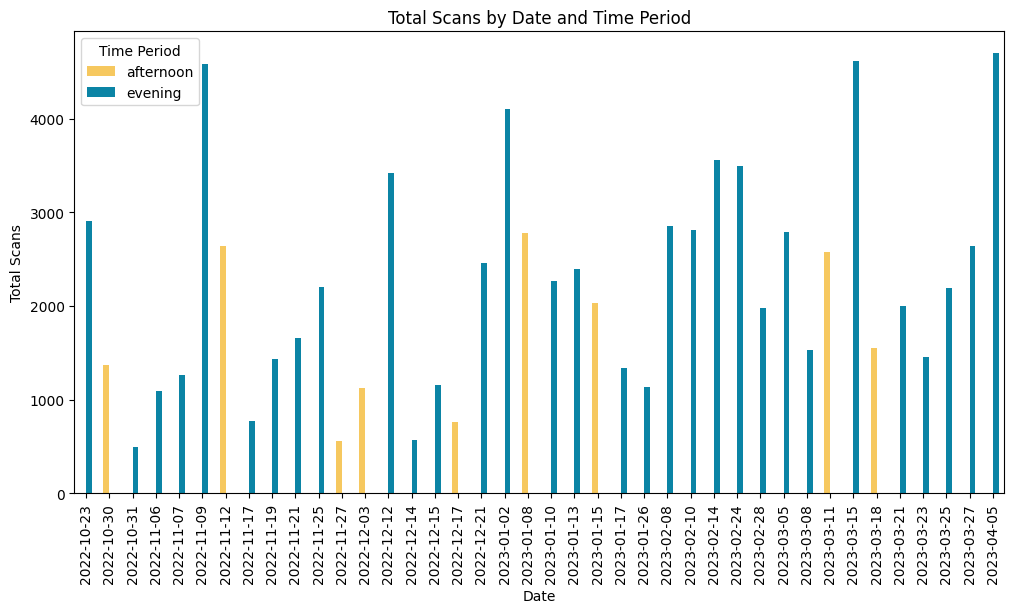

In [ ]:
# Show Evening vs Afternoon Games
grouped = question_1.groupby(['Time Period', 'Date'])['Total Scans'].sum()

ax = grouped.unstack(level=0).plot(kind='bar', color=['#F6C85F', '#0B84A5'], figsize=(12, 6))

ax.set_xlabel('Date')
ax.set_ylabel('Total Scans')
ax.set_title('Total Scans by Date and Time Period')

plt.show()

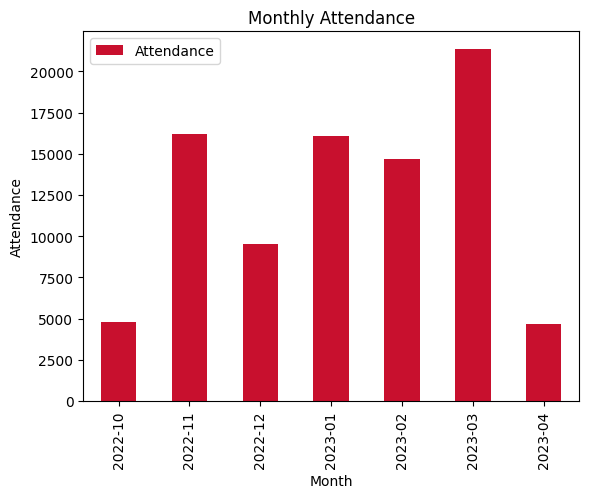

In [ ]:
monthly_stats.plot(kind='bar', y='Attendance', color='#C8102E')

plt.title('Monthly Attendance')
plt.xlabel('Month')
plt.ylabel('Attendance')
plt.show()

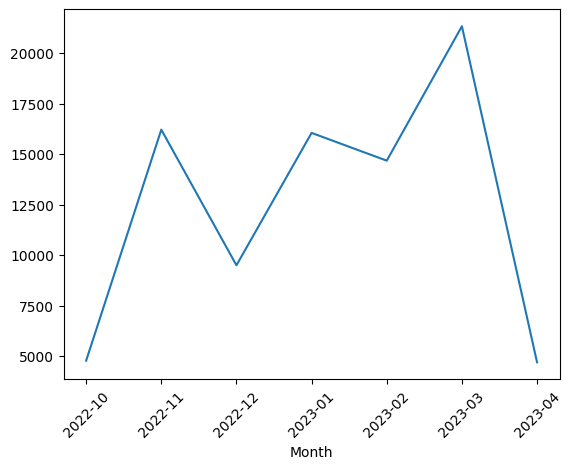

In [ ]:
# Line Plot for Monthly
plt.plot(monthly_stats["Attendance"])
plt.xlabel("Month")
plt.xticks(monthly_stats.index, rotation=45)

plt.show()

## Task 2: Reservations
Count the number of UCP members with reservations >=5 and scans >=3. Of these, how many UCP members attended every game they reserved?

TENANT MEMBER NUMBER: 1000-000-0000 can be dropped from this question (ticket add-ons)

In [ ]:

ucp_reservations.head()
ucp_reservations = ucp_reservations.drop(ucp_reservations[ucp_reservations['TENANT_MEMBER_NUMBER'] == '1000-000-0000'].index)
print((ucp_reservations["TENANT_MEMBER_NUMBER"] == "1000-000-0000").sum())

0


In [ ]:
ucp_reservations.head(1)

,TICKET_ID,EVENT_NAME,EVENT_DATE_LOCAL,event_date,SECTION,ROW,SEAT,RESERVED_AT,TENANT_MEMBER_NUMBER
0,88104,Suns @ Clippers,2022-10-23 19:00:00,2022-10-23,301,3,4,2022-08-22 08:08:00,1000-000-0152


In [ ]:
# Could've done this in one line
question_2 = pd.DataFrame()
question_2['TENANT_MEMBER_NUMBER'] = ucp_reservations['TENANT_MEMBER_NUMBER']
question_2['event_date'] = ucp_reservations['event_date']
question_2['SECTION'] = ucp_reservations['SECTION']
question_2['ROW'] = ucp_reservations['ROW']
question_2['SEAT'] = ucp_reservations['SEAT']

In [ ]:
counts = question_2['TENANT_MEMBER_NUMBER'].value_counts()
question_2 = question_2[question_2['TENANT_MEMBER_NUMBER'].isin(counts[counts >= 5].index)]
print(counts)
# 447 members, 34 highest, 1 lowest

1000-000-0170    34
1000-000-0425    34
1000-000-0439    34
1000-000-0438    34
1000-000-0337    34
                 ..
1000-000-0582     1
1000-000-0500     1
1000-000-0222     1
1000-000-0262     1
1000-000-0289     1
Name: TENANT_MEMBER_NUMBER, Length: 447, dtype: int64


In [ ]:
# Collecting UCP Member Data
tenant_data = pd.DataFrame({'Tenant Number': question_2['TENANT_MEMBER_NUMBER'].unique()})
reserved_games = question_2['TENANT_MEMBER_NUMBER'].value_counts().values
tenant_data['Reserved Games'] = reserved_games
tenant_data['Scanned Games'] = 0
tenant_data.head()

,Tenant Number,Reserved Games,Scanned Games
0,1000-000-0152,34,0
1,1000-000-0153,34,0
2,1000-000-0257,34,0
3,1000-000-0324,34,0
4,1000-000-0325,34,0


In [ ]:
for index, row in question_2.iterrows():
    event_date = row['event_date']
    section = row['SECTION']
    row_name = row['ROW']
    seat_number = row['SEAT']
    tenant_number = row['TENANT_MEMBER_NUMBER']
    
    ucp_scans_subset = ucp_scans[(ucp_scans['event_date'] == event_date) & (ucp_scans['section_name'] == section) & (ucp_scans['row_name'] == row_name) & (ucp_scans['seat_number'] == seat_number)]
    
    if not ucp_scans_subset.empty:
        tenant_data.loc[tenant_data['Tenant Number'] == tenant_number, 'Scanned Games'] += 1

In [ ]:
tenant_data["Scanned >= Reserved"] = tenant_data["Scanned Games"] >= tenant_data["Reserved Games"]
num_users = tenant_data["Scanned >= Reserved"].sum()

In [ ]:
tenant_data.head(len(tenant_data))

,Tenant Number,Reserved Games,Scanned Games,Scanned >= Reserved
0,1000-000-0152,34,26,False
1,1000-000-0153,34,26,False
2,1000-000-0257,34,24,False
3,1000-000-0324,34,30,False
4,1000-000-0325,34,30,False
...,...,...,...,...
352,1000-000-0616,5,6,True
353,1000-000-0619,5,8,True
354,1000-000-0622,5,9,True
355,1000-000-0623,5,9,True


### Data Visualization Question 2

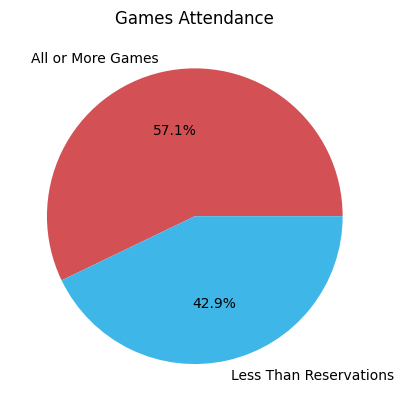

In [ ]:
# Pie Chart Showing Percentage
values = [204, 357-204]
labels = ['All or More Games', 'Less Than Reservations']
colors = ['#D35055', '#3FB6E8']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Games Attendance')

plt.show()

In [ ]:
tenant_data['ratio'] = tenant_data['Scanned Games'] / tenant_data['Reserved Games']

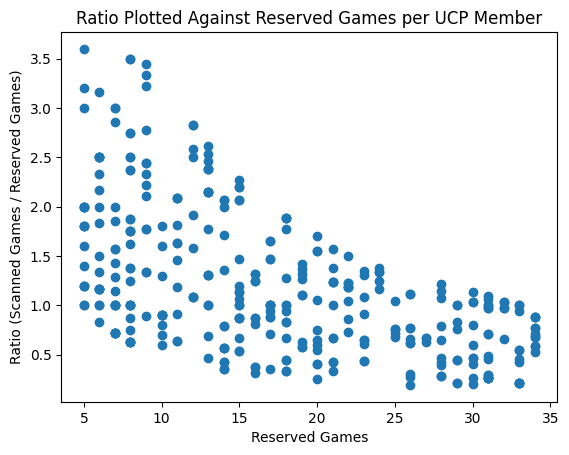

In [ ]:
# Scatter plot for Ratio 

plt.scatter(tenant_data["Reserved Games"], tenant_data["ratio"])

plt.xlabel("Reserved Games")
plt.ylabel("Ratio (Scanned Games / Reserved Games)")
plt.title("Ratio Plotted Against Reserved Games per UCP Member")

plt.show()

## Task 3: Average Cost
Find the average cost of a single game ticket for each game in the dataset provided. Then compare the total value if all UCP eligibile games were purchased at their average single game price, against the UCP package price. Assume the ICP Package price is $350

In [2]:
grouped_data = single_stats.groupby('event_datetime')

# count the number of instances and sum the price column for each group
count_instances = grouped_data.size()
sum_price = grouped_data['price'].sum()

# create a new dataframe with the required columns
game_cost = pd.DataFrame({'Instances': count_instances, 'Total Price': sum_price})
game_cost['Average Price'] = game_cost['Total Price'] / game_cost['Instances']
game_cost.head()

NameError: ignored

In [3]:
# Average Price in ucp_comparison
unique_dates_ucp = ucp_reservations['EVENT_DATE_LOCAL'].unique()
ucp_comparison = pd.DataFrame(columns=['EVENT_DATE_LOCAL', 'Average Price'])

for date in unique_dates_ucp:
    if date in game_cost.index:
        row = game_cost.loc[date]
        ucp_comparison = ucp_comparison.append({'EVENT_DATE_LOCAL': row.name,
                                                'Average Price': row['Average Price']},
                                               ignore_index=True)

NameError: ignored

In [ ]:
ucp_comparison['EVENT_DATE_LOCAL'] = ucp_comparison['EVENT_DATE_LOCAL'].dt.strftime('%Y-%m-%d')

In [ ]:
ucp_comparison['EVENT_DATE_LOCAL'] = pd.to_datetime(ucp_comparison['EVENT_DATE_LOCAL'])

In [ ]:
ucp_comparison['UCP Price'] = 10
print(f"Average Price Sum: {ucp_comparison['Average Price'].sum()}\nUCP Price: {ucp_comparison['UCP Price'].sum()}")
ucp_comparison.head(len(ucp_comparison))

In [ ]:
# Plotting

fig, ax = plt.subplots()

ax.plot(ucp_comparison['EVENT_DATE_LOCAL'], ucp_comparison['Average Price'], label='Average Price')
ax.plot(ucp_comparison['EVENT_DATE_LOCAL'], ucp_comparison['UCP Price'], label='UCP Price')

ax.scatter(ucp_comparison['EVENT_DATE_LOCAL'], ucp_comparison['Average Price'])
ax.scatter(ucp_comparison['EVENT_DATE_LOCAL'], ucp_comparison['UCP Price'])

ax.set_xlabel('EVENT_DATE_LOCAL')
ax.set_ylabel('Price')
ax.set_title('Comparison of Average Price and UCP Price')
ax.legend()

plt.show()

In [ ]:
ucp_comparison.head()

## Task 4: Basketball Reference
Pull from the 22/23 Game schedule, is there a difference in reservations and scans for UCP members and single game buyers during homestands (3 or more consecutive home games) vs all other games.

**Hint: LAC had six homestands (~3 games). Analyze the reservations/sales/scans of all games in those siz homestands, compared to remaining games.**

In [ ]:
homestands['Date'] = pd.to_datetime(homestands['Date'], format="%a %b %d %Y")

In [ ]:
homestands = homestands.drop(columns=['Unnamed: 1', 'G','Unnamed: 8', 'Unnamed: 4', 'Unnamed: 9'])
homestands = homestands.rename(columns={'Unnamed: 6': 'Home/Away'})

In [ ]:
# Homestand_Games
indices = [9,10,11,12,15,16,17,28,29,30,31,32,41,42,43,44,45,57,58,59,66,67,68,69,70,72,73,74,75]
homestand_games = pd.DataFrame({'Dates': homestands.loc[indices, 'Date']})
merged_df = homestand_games.merge(ucp_comparison, left_on='Dates', right_on='EVENT_DATE_LOCAL', how='left')
homestand_games = homestand_games.reset_index(drop=True)
homestand_games['UCP Reservations'] = 0

In [ ]:
# UCP Reservations for Homestand_games
ucp_res_dict = ucp_reservations['event_date'].value_counts()
homestand_games['UCP Reservations'] = homestand_games['Dates'].map(ucp_res_dict).fillna(0).astype(int)
# Taking out those with zero reservations, indicating they were not UCP elgible games
homestand_games = homestand_games[homestand_games['UCP Reservations'] != 0]


In [ ]:
# Compute the set of dates in ucp_reservations but not in homestand_games
ucp_res_dates = set(ucp_reservations['event_date'])
homestand_dates = set(homestand_games['Dates'])
not_homestand_dates = ucp_res_dates - homestand_dates

# Create a new DataFrame with the not_homestand_dates
not_homestand_games = pd.DataFrame({'Dates': list(not_homestand_dates), 'UCP Reservations': 0})

In [ ]:
# UCP Reservations non_homestand_games
not_homestand_games['UCP Reservations'] = not_homestand_games['Dates'].map(ucp_res_dict).fillna(0).astype(int)

In [ ]:
# Initializing Columns
homestand_games['UCP Scans'] = 0
not_homestand_games['UCP Scans'] = 0

homestand_games['Single Scans'] = 0
not_homestand_games['Single Scans'] = 0

homestand_games['Average Price'] = 0
not_homestand_games['Average Price'] = 0

In [ ]:
# UCP Scans
ucp_scans_dict = ucp_scans['event_date'].value_counts()
homestand_games['UCP Scans'] = homestand_games['Dates'].map(ucp_scans_dict).fillna(0).astype(int)
not_homestand_games['UCP Scans'] = not_homestand_games['Dates'].map(ucp_scans_dict).fillna(0).astype(int)

In [ ]:
# Single Stats Scans
single_scans = single_stats['scan_datetime'].value_counts()
homestand_games['Single Scans'] = homestand_games['Dates'].map(single_scans).fillna(0).astype(int)
not_homestand_games['Single Scans'] = not_homestand_games['Dates'].map(single_scans).fillna(0).astype(int)

In [ ]:
# Average Price - homestand_games
for date in homestand_games['Dates']:
    mask = ucp_comparison['EVENT_DATE_LOCAL'] == date
    if mask.any():
        average_price = ucp_comparison.loc[mask, 'Average Price'].iloc[0]
        homestand_games.loc[homestand_games['Dates'] == date, 'Average Price'] = average_price


In [ ]:
# Average Price - not_homestand_games
for date in not_homestand_games['Dates']:
    mask = ucp_comparison['EVENT_DATE_LOCAL'] == date
    if mask.any():
        average_price = ucp_comparison.loc[mask, 'Average Price'].iloc[0]
        not_homestand_games.loc[not_homestand_games['Dates'] == date, 'Average Price'] = average_price

In [ ]:
homestands.head(len(homestands))

In [ ]:
not_homestand_games.head(len(not_homestand_games))

## Data PreProcessing For Model

In [ ]:
all_games = homestands

In [ ]:
# Change Dates
all_games['Date'] = pd.to_datetime(homestands['Date'], format="%a %b %d %Y")

# Drop Columns
all_games = all_games.drop(columns=['Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 9', 'Unnamed: 1'])

# Change Column Names
all_games = all_games.rename(columns={'G': "Games", "Unnamed: 8": "Outcome"})

### Game Plan for Model
#### Feature Engineering


*   Subtract W - L to get new column (Win/Loss Ratio)
*   Get outcome and put it one row before
*   For each opponent, championships
*   Time (Afternoon / Evening / Night)






In [ ]:
# Dropping the last row
all_games = all_games.drop(all_games.index[-1])

In [ ]:
# Changing the Streak into an integer value
def convert_streak(streak):
  sign = 1 if streak[0] == 'W' else -1
  value = int(streak[2:])
  return sign * value

all_games['Streak'] = all_games['Streak'].apply(convert_streak)

In [ ]:
# Move the Streaks one row down so that it shows Streak going in
all_games['Streak'] = all_games['Streak'].shift(1)
all_games['Streak'][0] = 0

In [ ]:
# Shift Win and Losses 1 down and then set the first one to zero zero
all_games['W'] = all_games['W'].shift(1)
all_games['W'][0] = int(0)

all_games['L'] = all_games['L'].shift(1)
all_games['L'][0] = int(0)

In [ ]:
# Outcome Change W to 1 and L to 0 then shift 1 down and set row 1 to zero
all_games['Outcome'] = all_games['Outcome'].replace('W', 1).replace(['L', 'D'], 0)
all_games['Outcome'] = all_games['Outcome'].shift(1)

In [ ]:
# Tm Opp shift down
all_games["Tm"] = all_games['Tm'].shift(1)
all_games["Opp"] = all_games["Opp"].shift(1)
# Difference between Tm - Opp in another column
all_games["Difference"] = all_games["Tm"] - all_games['Opp']

In [ ]:
# Preprocess Date to find Monday-Sunday
# Convert the column to datetime format
all_games["Date"] = pd.to_datetime(all_games['Date'])
all_games["Day of Week"] = all_games["Date"].dt.day_name()

In [ ]:
## MAKING DATAFRAME OF DATE // WEEKDAY // SINGLE SCANS // UCP SCANS // TOTAL SCANS
ucp_scans_dates = pd.DataFrame(ucp_scans["scan_datetime"].dt.date)
total_scans = pd.DataFrame()

In [ ]:
# UCP Scans in UCP Scans Dates
date_counts = ucp_scans_dates['scan_datetime'].value_counts()
total_scans["Dates"] = date_counts.index
total_scans["UCP Scans"] = date_counts.values

# Total Scans
total_scans["Total Attendance"] = total_scans["UCP Scans"]

# Get Weekday for each 
total_scans["Dates"] = pd.to_datetime(total_scans["Dates"])
total_scans["Day of Week"] = total_scans["Dates"].dt.day_name()

In [ ]:
pd.set_option('display.max_rows', None)
total_scans.head(len(total_scans))

In [ ]:
# Ranking 
day_totals = total_scans.groupby('Day of Week')['Total Attendance'].sum()
weekday_ranking = {
    "Monday": 1,
    "Sunday": 2,
    "Saturday": 3,
    "Friday": 4,
    "Wednesday": 5, 
    "Tuesday": 6,
    "Thursday": 7
}

all_games['Weekday Ranking'] = all_games['Day of Week'].map(weekday_ranking)

In [ ]:
# Add Attendance
merged = pd.merge(all_games, total_scans, left_on='Date', right_on='Dates', how='inner')
merged.head()
# Assign the values in the 'Total Attendance' column of the total_scans DataFrame to a new 'Total Attendance' column in the all_games DataFrame
all_games['Total Attendance'] = merged['Total Attendance']

In [ ]:
merged.head()

In [ ]:
# Dropping Not needed Values
all_games = all_games.drop(columns=["Start (ET)", "Day of Week"])

In [ ]:
# Drop the NaN values
# Save Portland before you do it
all_games.loc[all_games.index[-1], 'Total Attendance'] = 1
all_games = all_games.dropna(subset=['Total Attendance'])

In [ ]:
team_data.head()

In [ ]:
# Team Data --- Need to extract: Founded, Joined NBA, Capacity, Year Opened, Championships, Vegas 21/22, Vegas 22/23
team_all_games_merge = pd.merge(all_games, team_data, left_on='Opponent', right_on='Team Full Name')
# Keep only the desired columns
columns_to_keep = ['Founded', 'Joined NBA', 'Capacity', 'Year Opened', 'Championships', 'Vegas Over/Under 21/22', 'Vegas Over/Under 22/23']

In [ ]:
all_games = team_all_games_merge[['Date', 'Opponent', 'Total Attendance', "Outcome", "Tm", "Opp", "W", "L", "Streak", "Difference", "Weekday Ranking",] + columns_to_keep]

In [ ]:
# Team Stats for Opponent
team_stats = pd.read_excel('sportsref_download.xlsx')

In [ ]:
# Need to drop MOV, ORtg, DRtg, NRtg, W, L, Conf, Div
team_stats = team_stats.drop(columns=['MOV', 'ORtg', 'DRtg', 'NRtg', 'W', 'L', 'Conf', 'Div'])
# Keeping all adjusted stats

# Rename Columns 
team_stats = team_stats.rename(columns={'W/L%': "Win Loss Ratio", "MOV/A": "Margin of Victory", "ORtg/A": "Offensive Rating", "DRtg/A": "Defensive Rating", "NRtg/A": "Net Rating"})

In [ ]:
team_stats.head()

In [ ]:
all_games = pd.merge(all_games, team_stats, left_on='Opponent', right_on='Team')

In [ ]:
# Drop the additional team column
all_games = all_games.drop(columns=["Team"])

In [ ]:
# Move Total Attendance to the very right and drop top row
total_attendance = all_games.pop('Total Attendance')
all_games['Total Attendance'] = total_attendance
all_games = all_games.iloc[1:]

In [ ]:
portland_trailblazer = all_games.iloc[24:25, :]
portland_trailblazer.head()

In [ ]:
# Drop Portland Game that we want to predict
all_games = all_games[all_games['Date'] != '2023-04-08']

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
all_games.head(len(all_games))

## Data Visualization

In [ ]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np

<Axes: >

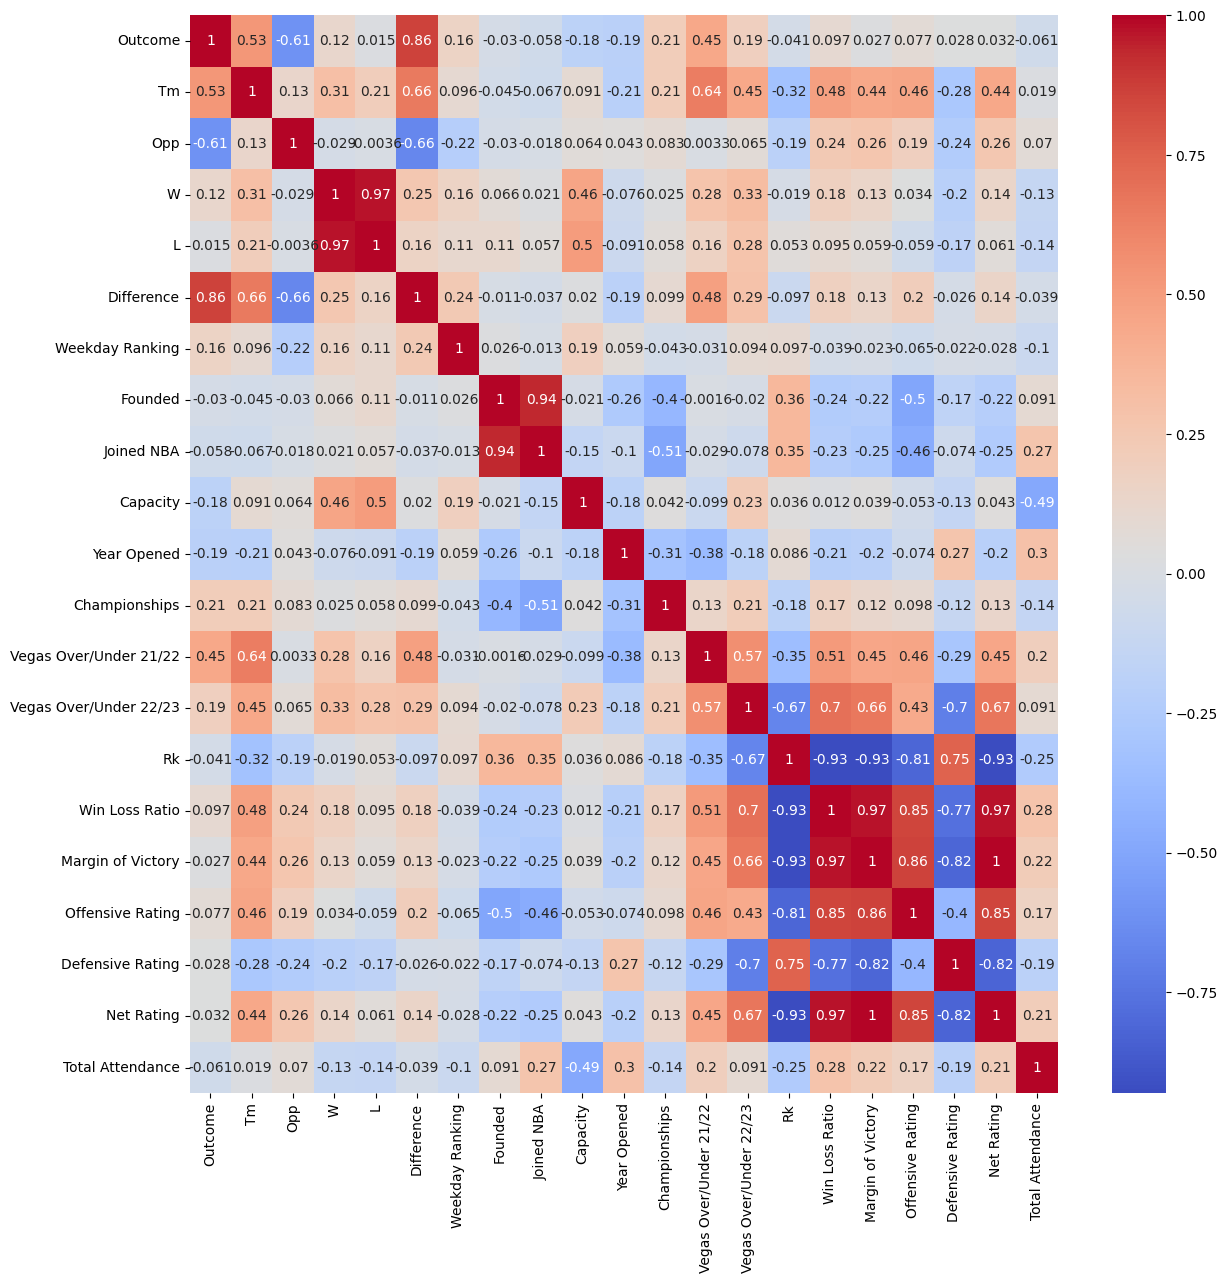

In [ ]:
cols = ['Outcome', 'Tm', 'Opp', 'W', 'L', 'Difference', 'Weekday Ranking',
        'Founded', 'Joined NBA', 'Capacity', 'Year Opened', 'Championships',
        'Vegas Over/Under 21/22', 'Vegas Over/Under 22/23', 'Rk',
        'Win Loss Ratio', 'Margin of Victory', 'Offensive Rating',
        'Defensive Rating', 'Net Rating', 'Total Attendance']

corr_matrix = all_games[cols].corr()

plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

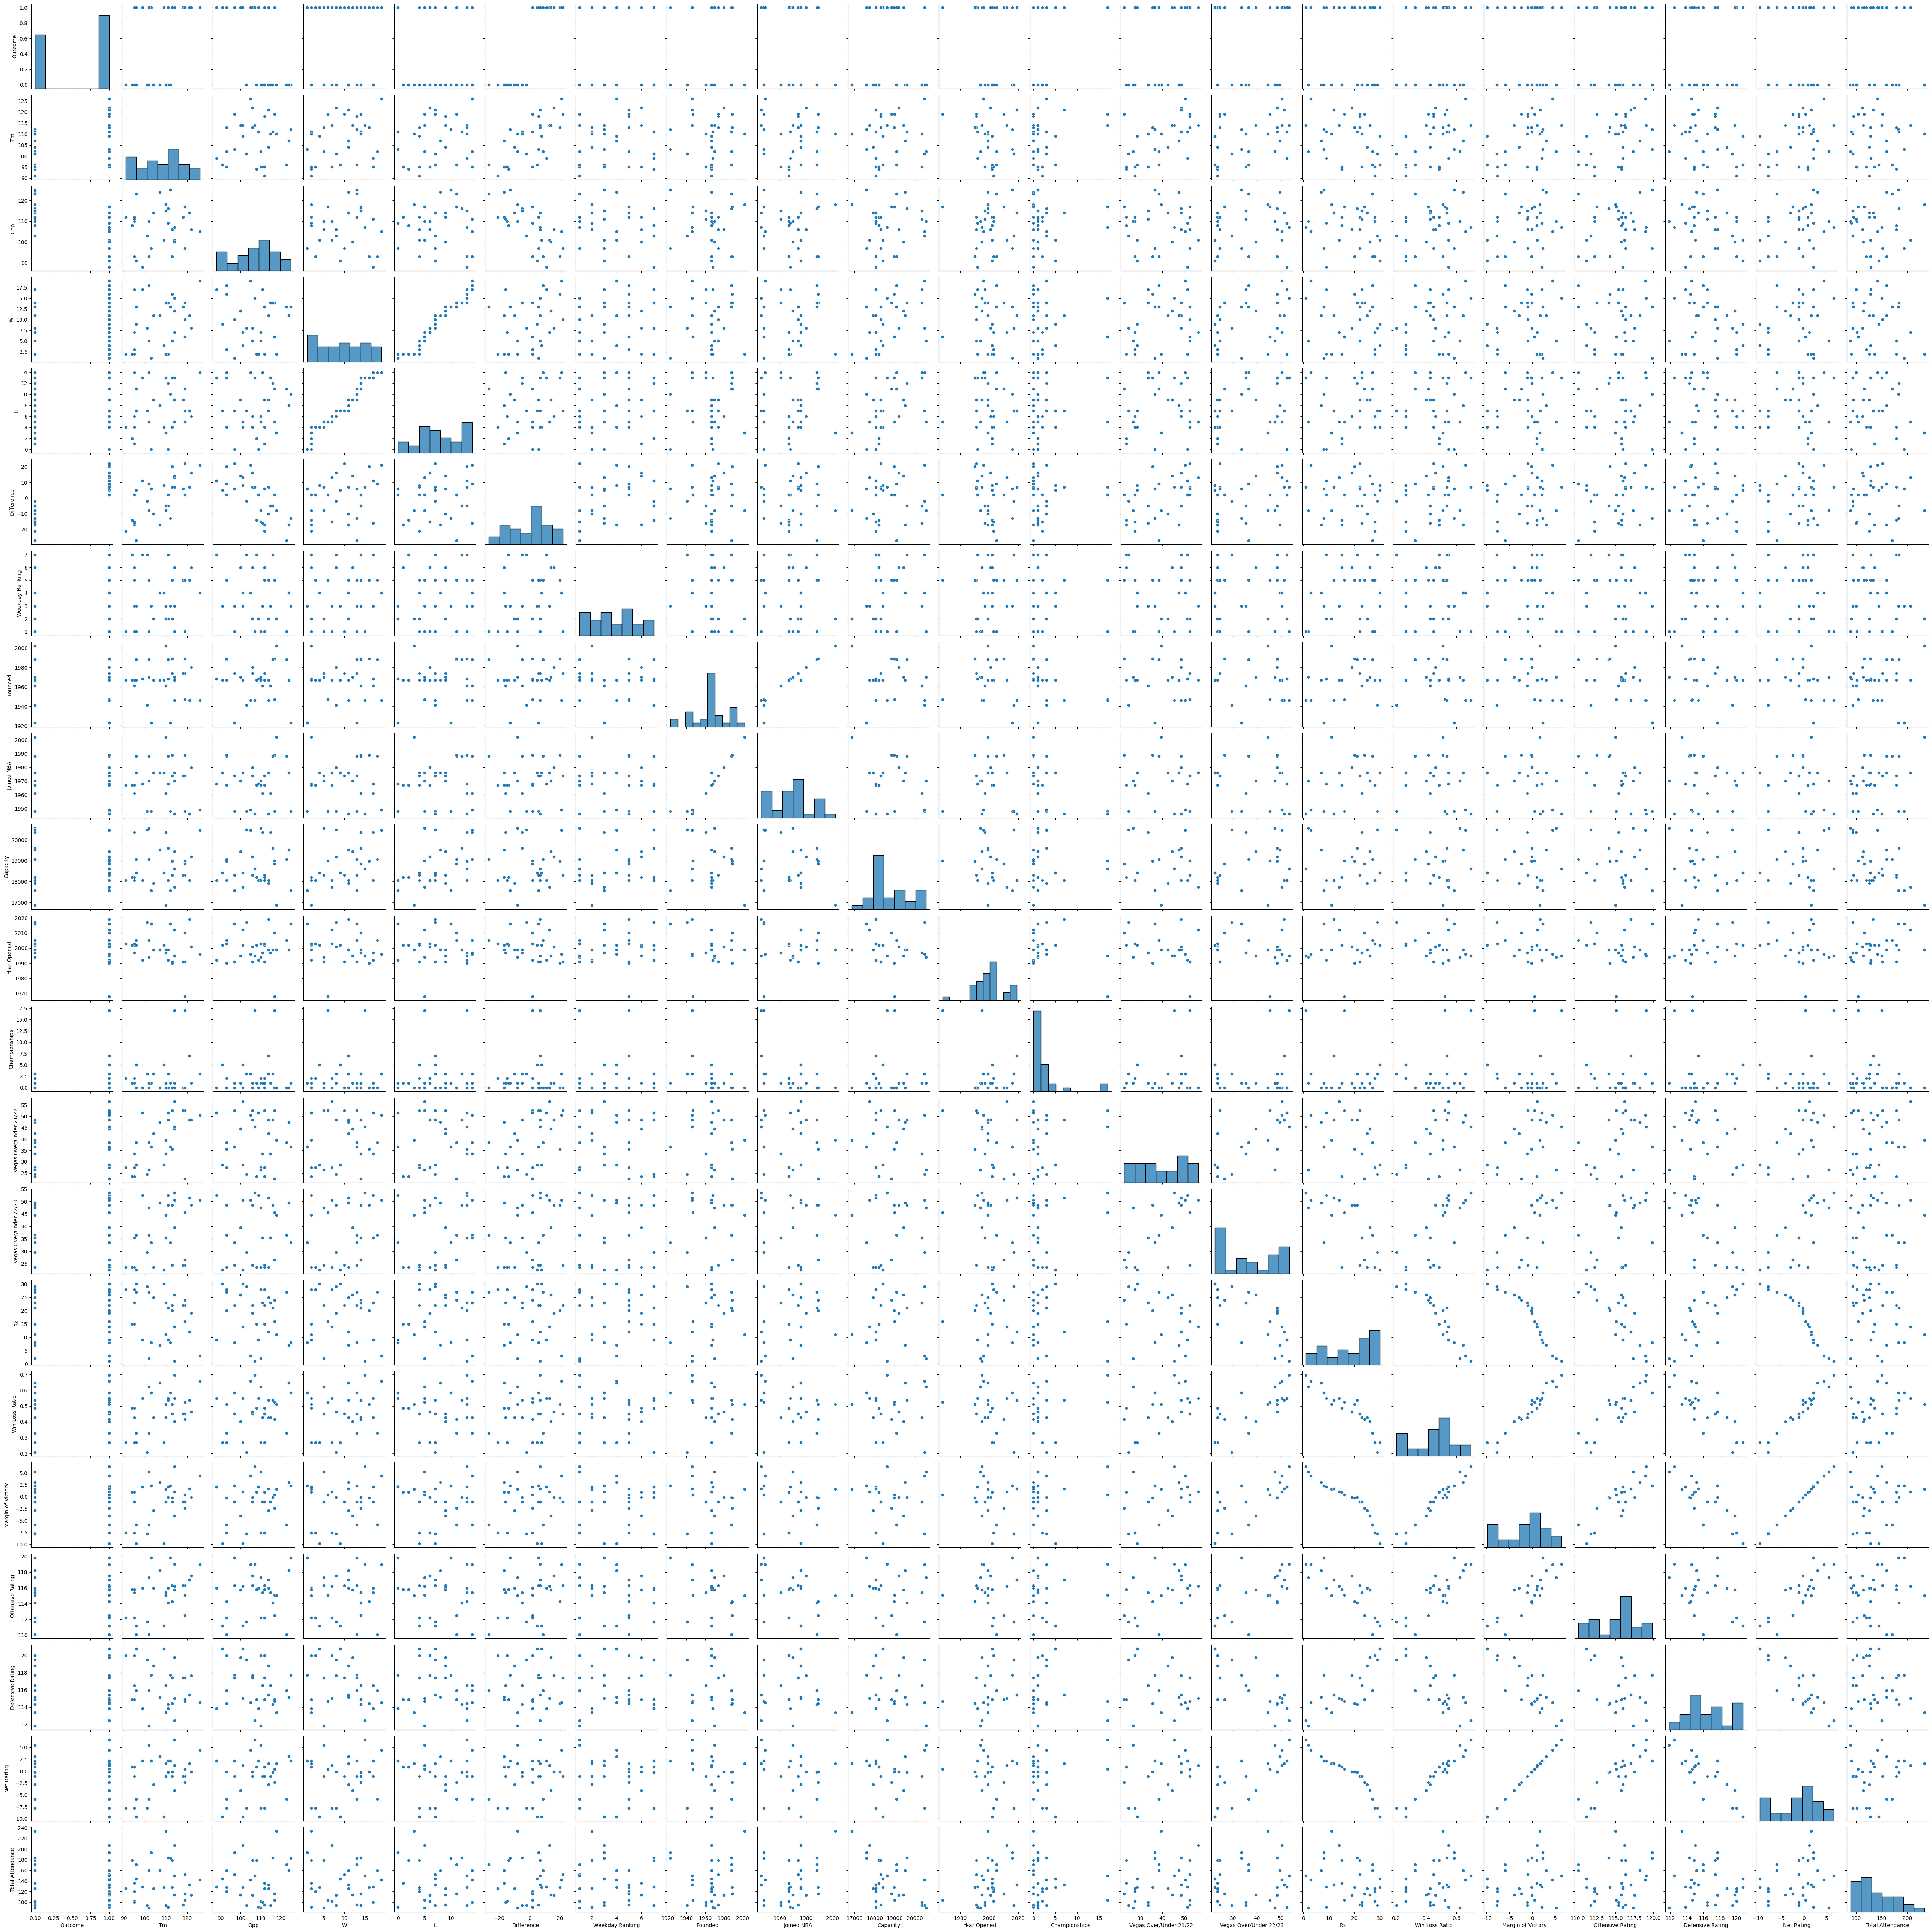

In [ ]:
sns.pairplot(model_dataset)

# Linear Regression Model

In [ ]:
model_dataset = all_games.loc[:, cols]
# See some Multicolinearity --> Win Loss Ratio with Net Rating & Margin of Victory, taking those two out
features = ['Outcome', 'Tm', 'Opp', 'W', 'L', 'Difference', 'Weekday Ranking',
        'Founded', 'Joined NBA', 'Capacity', 'Year Opened', 'Championships',
        'Vegas Over/Under 21/22', 'Vegas Over/Under 22/23', 'Rk','Offensive Rating',
        'Defensive Rating', 'Net Rating']

In [ ]:
# Checking for P-Values
X = model_dataset[features]
y = model_dataset['Total Attendance']

# Add a constant to the feature matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print out the model summary, including p-values and adjusted R-squared
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Attendance   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     2.713
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0291
Time:                        01:37:49   Log-Likelihood:                -142.33
No. Observations:                  33   AIC:                             320.7
Df Residuals:                      15   BIC:                             347.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -7691

In [ ]:
y_pred = model.predict(X)

# calculate RMSE
rmse = sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

RMSE: 18.065990931114882


In [ ]:
iteration1_preds = pd.DataFrame({"Y": y, "Y Predicted": y_pred})
print(iteration1_preds)

In [ ]:
# Predict for Portland Trail Blazers
portland_trailblazer['const'] = np.ones(len(portland_trailblazer))

# Predict the total attendance for the single entry
predicted_attendance = model.predict(portland_trailblazer_1)
print(predicted_attendance)

## Iteration 2

In [ ]:
iteration2_features = ["Year Opened", "Joined NBA", "Vegas Over/Under 21/22", "Vegas Over/Under 22/23"]

In [ ]:
X = model_dataset[iteration2_features]
y = model_dataset['Total Attendance']

# Add a constant to the feature matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Predictions
y_pred = model.predict(X)
# calculate RMSE
rmse = sqrt(mean_squared_error(y, y_pred))

# Print out the model summary, including p-values and adjusted R-squared
print(model.summary())
print('RMSE:', rmse)

                            OLS Regression Results                            
Dep. Variable:       Total Attendance   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.145
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0296
Time:                        01:30:09   Log-Likelihood:                -159.38
No. Observations:                  33   AIC:                             328.8
Df Residuals:                      28   BIC:                             336.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5148

In [ ]:
# Print Predictions and Y
iteration2_preds = pd.DataFrame({"Y": y, "Y Predicted": y_pred})
print(iteration2_preds)

## Iteration 3

In [ ]:
iteration3_features = ["Year Opened", "Joined NBA"]

In [ ]:
X = model_dataset[iteration3_features]
y = model_dataset['Total Attendance']

# Add a constant to the feature matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Predictions
y_pred = model.predict(X)
# calculate RMSE
rmse = sqrt(mean_squared_error(y, y_pred))

# Print out the model summary, including p-values and adjusted R-squared
print(model.summary())
print('RMSE:', rmse)

                            OLS Regression Results                            
Dep. Variable:       Total Attendance   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     3.299
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0507
Time:                        01:32:50   Log-Likelihood:                -162.23
No. Observations:                  33   AIC:                             330.5
Df Residuals:                      30   BIC:                             334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3845.1770   1566.769     -2.454      

In [ ]:
# Print Predictions and Y
iteration3_preds = pd.DataFrame({"Y": y, "Y Predicted": y_pred})
print(iteration3_preds)